In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_csv('versao_2_spotify_songs.csv')
print("Primeiras linhas do DataFrame:")
print(df.head().to_string(index=False))

Primeiras linhas do DataFrame:
 track_popularity playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
                7            pop        electropop         0.665   0.600   11    -7.396     0       0.0344        0.0103          0.455000    0.0928    0.595 102.002       247920
               48            rap              trap         0.620   0.590    5    -8.289     0       0.0497        0.3420          0.000000    0.0958    0.270 160.026       192000
                2            rap              trap         0.703   0.376    6   -17.772     0       0.0752        0.2780          0.000000    0.0540    0.650 140.015       213618
                4            rap           hip hop         0.583   0.527   11    -7.876     1       0.0733        0.7150          0.000007    0.1540    0.395  97.346       187036
                0            rap              trap         0.594   0.393  

## 1. Distribuição Estatística Básica de Colunas Numéricas:

In [13]:
# Visualizando a descrição estatística do DataFrame
descricao_estatistica = df.describe()
print(descricao_estatistica)

       track_popularity  danceability       energy          key     loudness  \
count       9864.000000   9864.000000  9864.000000  9864.000000  9864.000000   
mean          51.014700      0.677046     0.694594     5.384935    -6.332683   
std           20.827159      0.135529     0.178268     3.641122     2.762310   
min            0.000000      0.077100     0.016700     0.000000   -26.207000   
25%           37.000000      0.592000     0.580000     2.000000    -7.614000   
50%           50.000000      0.691000     0.712000     6.000000    -5.858500   
75%           66.000000      0.775000     0.831000     9.000000    -4.458000   
max          100.000000      0.979000     1.000000    11.000000     0.326000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  9864.000000  9864.000000   9864.000000       9864.000000  9864.000000   
mean      0.540856     0.114036      0.191314          0.094708     0.185373   
std       0.498353     0.101200      0.

## 2. Correlações entre Variáveis Numéricas:

In [4]:
# Calculando a correlação entre as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


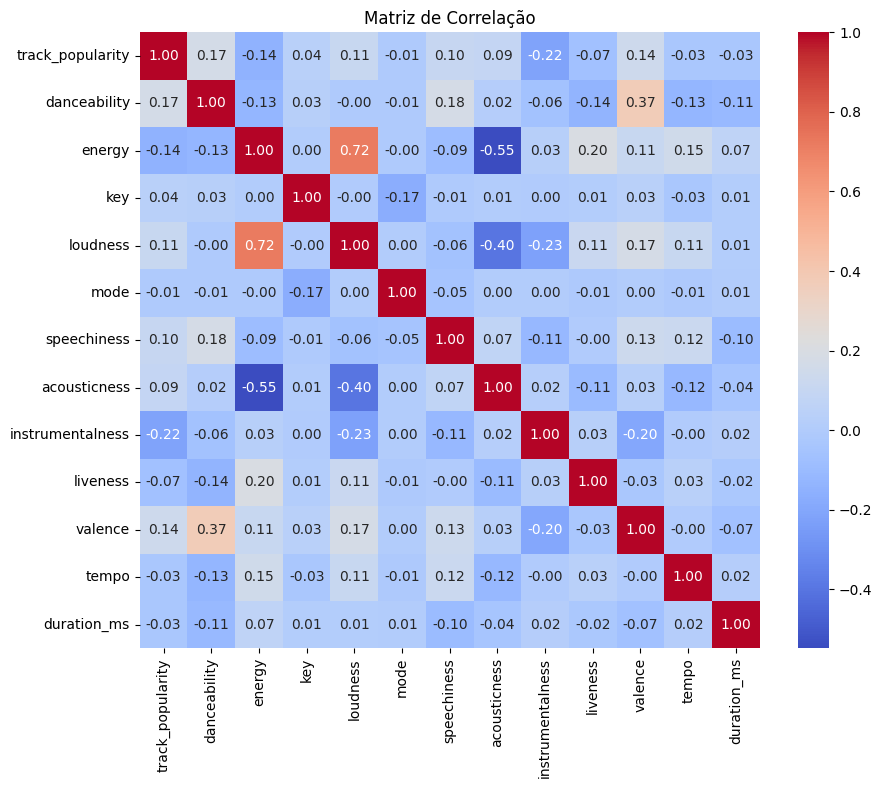

In [5]:
# Exibindo a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## 3. Distribuição de Gêneros e Subgêneros de Playlist:

In [16]:
# Contando a frequência dos valores nas colunas de gênero e subgênero
frequencia_genero = df['playlist_genre'].value_counts()
frequencia_subgenero = df['playlist_subgenre'].value_counts()

print(frequencia_genero)
print(frequencia_subgenero)


playlist_genre
edm      2505
latin    2010
rap      1983
pop      1541
r&b      1200
rock      625
Name: count, dtype: int64
playlist_subgenre
trap                         861
hip hop                      855
electro house                721
dance pop                    715
big room                     691
pop edm                      649
latin pop                    628
tropical                     596
hip pop                      585
progressive electro house    444
indie poptimism              441
urban contemporary           434
reggaeton                    422
hard rock                    399
latin hip hop                364
post-teen pop                269
gangster rap                 199
neo soul                     179
electropop                   116
classic rock                 108
permanent wave               106
southern hip hop              68
album rock                    12
new jack swing                 2
Name: count, dtype: int64


## 4. Popularidade Média por Classe de Popularidade:

In [7]:
# Converting 'track_popularity' to categorical labels
def classify_popularity(popularity):
    if popularity <= 20:
        return 0
    elif popularity <= 40:
        return 1
    elif popularity <= 60:
        return 2
    else:
        return 3

df['popularity_class'] = df['track_popularity'].apply(classify_popularity)

In [17]:
# Calculando a média da popularidade por classe de popularidade
media_popularidade = df.groupby('popularity_class')['track_popularity'].mean()
print(media_popularidade)

popularity_class
0    11.967611
1    32.606478
2    50.322302
3    74.271597
Name: track_popularity, dtype: float64


## 5. Distribuição de Dados Categóricos:

In [11]:
# Contagem de valores em colunas categóricas
key_counts =df['key'].value_counts()
mode_counts =df['mode'].value_counts()
print(key_counts)
print(mode_counts)


key
1     1293
0     1021
11     957
7      923
9      839
6      832
5      813
8      802
2      802
10     696
4      590
3      296
Name: count, dtype: int64
mode
1    5335
0    4529
Name: count, dtype: int64
